In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding,Flatten,Dense
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import confusion_matrix
import pickle
import matplotlib.pyplot as plt
from scipy.stats import sem
from tqdm import tqdm
from tensorflow.keras.layers import Bidirectional, LSTM,Dropout
import seaborn as sns

2024-05-17 16:55:34.236716: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 16:55:34.264387: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 16:55:34.264408: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 16:55:34.264426: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 16:55:34.269447: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 16:55:34.269782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# Cross validated embedding model

In [5]:

xlsx_file = 'data/Clean_results_2019.xlsx'
df = pd.read_excel(xlsx_file, engine='openpyxl')


peptide_column = df['Peptide']
sequences = peptide_column.tolist()
#sequences = [sequences[i] for i in range(2, len(sequences), 3)]
survivin_column = df[u'Survivin, 1 µg/ml']
y = (survivin_column > 0).astype(int)
#y=y[2::3]


letter_to_int = {letter: i for i, letter in enumerate(set(''.join(sequences)))}

int_sequences = [[letter_to_int[letter] for letter in sequence] for sequence in sequences]

X = np.array(int_sequences)
max_sequence_length = max(len(sequence) for sequence in int_sequences)
    
params=[]
cn = 1
res=[]
res_acc=[]
for _ in range(100):


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)


    model = Sequential(name="embedding_Model")
    model.add(Embedding(input_dim=len(letter_to_int), output_dim=1, input_length=max_sequence_length, name='embedding'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid', name="Output_Dense"))

    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


    #model.summary()


    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, verbose=0, restore_best_weights=True)


    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0, callbacks=[early_stopping])


    test_loss, test_accuracy = model.evaluate(X_test, y_test,verbose=0)

    y_pred_binary = model.predict(X_test).round().astype(int)


    weighted_avg_accuracy = accuracy_score(y_test, y_pred_binary, sample_weight=None)

    print('Current counter: ',cn)    
    cn+=1
    layer=model.get_weights()
    res.append(layer)
    tf.keras.backend.clear_session()
    res_acc.append(weighted_avg_accuracy)
    print(weighted_avg_accuracy)


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


85/85 [==============================] - 0s 628us/step
Current counter:  1
0.7805782060785768
85/85 [==============================] - 0s 710us/step
Current counter:  2
0.795774647887324
85/85 [==============================] - 0s 687us/step
Current counter:  3
0.7976278724981468


KeyboardInterrupt: 


# No cross validatation embedding model

In [4]:
params=[]
cn = 1
res=[]
res_acc=[]
xlsx_file = 'data/Clean_results_2019.xlsx'
df = pd.read_excel(xlsx_file, engine='openpyxl')


peptide_column = df['Peptide']
sequences = peptide_column.tolist()
#sequences = [sequences[i] for i in range(2, len(sequences), 3)]
survivin_column = df[u'Survivin, 1 µg/ml']
y = (survivin_column > 0).astype(int)
#y=y[2::3]

letter_to_int = {letter: i for i, letter in enumerate(set(''.join(sequences)))}

int_sequences = [[letter_to_int[letter] for letter in sequence] for sequence in sequences]

X = np.array(int_sequences)
max_sequence_length = max(len(sequence) for sequence in int_sequences)
    
for _ in range(100):
    


    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)


    model = Sequential(name="embedding_Model")
    model.add(Embedding(input_dim=len(letter_to_int), output_dim=1, input_length=max_sequence_length, name='embedding'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid', name="Output_Dense"))

    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


    #model.summary()


    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, verbose=0, restore_best_weights=True)


    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0, callbacks=[early_stopping])


    test_loss, test_accuracy = model.evaluate(X_val, y_val,verbose=0)

    y_pred_binary = model.predict(X_val).round().astype(int)


    weighted_avg_accuracy = accuracy_score(y_val, y_pred_binary, sample_weight=None)

    print('Current counter: ',cn)    
    cn+=1

    layer=model.get_weights()[1]
    res.append(layer)
    tf.keras.backend.clear_session()
    res_acc.append(weighted_avg_accuracy)
    print(weighted_avg_accuracy)
    

/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


9/9 [==============================] - 0s 777us/step
Current counter:  1
0.7851851851851852



KeyboardInterrupt



# Load data embedding model

In [9]:

data_path = 'data/embedding_figure_data_layer_non_cross_valid.p'


with open(data_path, 'rb') as file:
    res1,res_acc1 = pickle.load(file)


print(np.mean(res_acc1) * 100)

print(sem(res_acc1))

data_path = 'data/embedding_figure_data_layer_cross_valid.p'


with open(data_path, 'rb') as file:
    res2,res_acc2 = pickle.load(file)

print(np.mean(res_acc2) * 100)

print(sem(res_acc2))


80.67407407407408
0.0022863790287089344
79.54114158636025
0.000850209212662444


# Figure embedding model

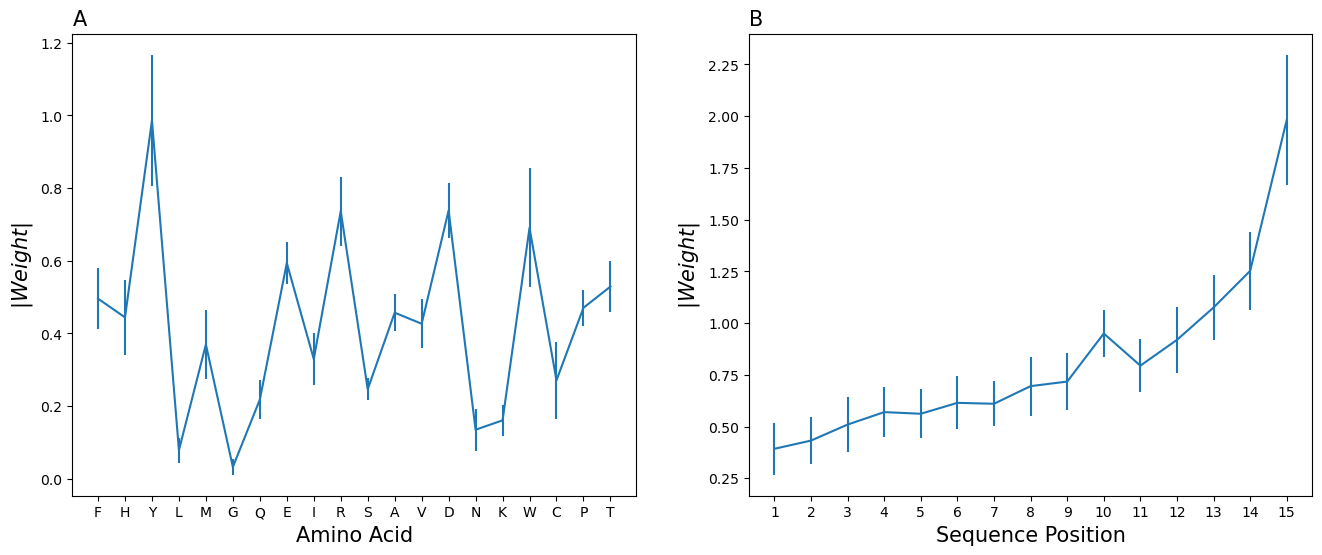

In [10]:
data_path = 'data/embedding_figure_data_layer_cross_valid_all_layers.p'


with open(data_path, 'rb') as file:
    res2,res_acc2,letter_to_int = pickle.load(file)
result2 = res2


labels=list(letter_to_int.keys())

emb_layer=np.array([item[0] for item in result2])
pos_layer=np.array([item[1] for item in result2])


result=pos_layer
fig,ax = plt.subplots(1,2, figsize = (16,6))

means = np.array([item[0] for item in list(np.mean(np.abs(result),axis=0))])
es=np.std(np.abs(result),axis=0)


es=[item[0] for item in list(es)]


means2 = np.array([item[0] for item in list(np.mean(np.abs(emb_layer),axis=0))])
es2=np.std(np.abs(emb_layer),axis=0)



es2=[item[0] for item in list(es2)]
ax[0].errorbar(np.array(range(len(labels))),means2,yerr=es2)
labels=list(letter_to_int.keys())

ax[0].set_xticks(range(len(labels)),labels)
ax[0].set_ylabel(r'$|Weight|$',fontsize=15)
ax[0].set_xlabel('Amino Acid',fontsize=15)
ax[0].set_title('A',loc='left',fontsize=15)


ax[1].errorbar(np.array([i+1 for i in range(len(means))]),means,yerr=es)

ticks=[i+1 for i in range(15)]
ax[1].set_xticks(ticks)
ax[1].set_ylabel(r'$|Weight|$',fontsize=15)
ax[1].set_xlabel('Sequence Position',fontsize=15)
ax[1].set_title('B',loc='left',fontsize=15)

plt.show()

# LSTM model

In [11]:




def create_lstm_model():
    model = Sequential(name="LSTM_Model")
    model.add(Embedding(input_dim=len(letter_to_int), output_dim=50, input_length=max_sequence_length, name='embedding'))
    model.add(Bidirectional(LSTM(90, return_sequences=True), name=f"LSTM_Layer_1"))
    model.add(Dropout(0.1, name=f"Dropout_2"))
    model.add(Bidirectional(LSTM(70), name="LSTM_Layer_2"))
    model.add(Dropout(0.1, name=f"Dropout_3"))
    model.add(Dense(1, activation='sigmoid', name="Output_Dense"))
    
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

result = []
for _ in tqdm(range(100)):
    xlsx_file = '/home/kmb/work/microarray_analysis/Clean_results_2019.xlsx'
    df = pd.read_excel(xlsx_file, engine='openpyxl')


    peptide_column = df['Peptide']
    sequences = peptide_column.tolist()
    #sequences = [sequences[i] for i in range(2, len(sequences), 3)]
    survivin_column = df[u'Survivin, 1 µg/ml']
    y = (survivin_column > 0).astype(int)
    #y=y[2::3]


    letter_to_int = {letter: i for i, letter in enumerate(set(''.join(sequences)))}

    int_sequences = [[letter_to_int[letter] for letter in sequence] for sequence in sequences]



    X = np.array(int_sequences)


    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=True)
    



    lstm_model = create_lstm_model()


    lstm_model.summary()


    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, verbose=0, restore_best_weights=True)


    history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0, callbacks=[early_stopping])


    test_loss, test_accuracy = lstm_model.evaluate(X, y)

    y_pred_binary = lstm_model.predict(X).round().astype(int)


    report = classification_report(y, y_pred_binary)


   # print("Classification Report:")
   # print(report)

    report = classification_report(y, y_pred_binary, output_dict=True)


    weighted_avg_accuracy = accuracy_score(y, y_pred_binary, sample_weight=None)
    
    conf_matrix = confusion_matrix(y, y_pred_binary)


    tp = conf_matrix[1, 1] 
    fp = conf_matrix[0, 1]  
    tn = conf_matrix[0, 0]  
    fn = conf_matrix[1, 0]  

    print("Weighted Average Accuracy:", weighted_avg_accuracy)
    metrics_dict = {
        'Precision_True': report['1']['precision'],
        'Recall_True': report['1']['recall'],
        'F1_Score_True': report['1']['f1-score'],

        'Precision_False': report['0']['precision'],
        'Recall_False': report['0']['recall'],
        'F1_Score_False': report['0']['f1-score'],
        'Weighted_Avg_Precision': report['weighted avg']['precision'],
        'Weighted_Avg_Recall': report['weighted avg']['recall'],
        'Weighted_Avg_F1_Score': report['weighted avg']['f1-score'],
        'Weighted_Avg_Accuracy' : weighted_avg_accuracy,
        'tp':tp,
        'fp':fp,
        'tn':tn,
        'fn':fn

        }
    
    result.append(metrics_dict)
    tf.keras.backend.clear_session()


  0%|                                                                                                                                                                              | 0/100 [00:00<?, ?it/s]/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 50)            1000      
                                                                 
 LSTM_Layer_1 (Bidirectiona  (None, 15, 180)           101520    
 l)                                                              
                                                                 
 Dropout_2 (Dropout)         (None, 15, 180)           0         
                                                                 
 LSTM_Layer_2 (Bidirectiona  (None, 140)               140560    
 l)                                                              
                                                                 
 Dropout_3 (Dropout)         (None, 140)               0         
                                                                 
 Output_Dense (Dense)        (None, 1)                 1

  1%|█▋                                                                                                                                                                 | 1/100 [01:45<2:53:20, 105.05s/it]/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 50)            1000      
                                                                 
 LSTM_Layer_1 (Bidirectiona  (None, 15, 180)           101520    
 l)                                                              
                                                                 
 Dropout_2 (Dropout)         (None, 15, 180)           0         
                                                                 
 LSTM_Layer_2 (Bidirectiona  (None, 140)               140560    
 l)                                                              
                                                                 
 Dropout_3 (Dropout)         (None, 140)               0         
                                                                 
 Output_Dense (Dense)        (None, 1)                 1

  1%|█▋                                                                                                                                                                 | 1/100 [02:08<3:32:22, 128.71s/it]


KeyboardInterrupt: 

# Load data LSTM model

In [12]:
label='Weighted_Avg_Accuracy'

path='/home/kmb/work/microarray_analysis/'


with open('data/every_third_cross.pkl', 'rb') as file:
    result_e = pickle.load(file)

with open('data/every_third_noncross.pkl', 'rb') as file: 
    result_e_not = pickle.load(file)
    
with open('data/all_cross.pkl', 'rb') as file:
    result = pickle.load(file)
    
with open('data/all_noncross.pkl', 'rb') as file:
    result_not = pickle.load(file)

# Statistics LSTM model

In [18]:
def stat_metric(res,label):
    form_res = np.array([entry[label] for entry in res])
    me = np.mean(form_res)
    se = np.std(form_res, ddof=1) / np.sqrt(len(form_res))
    return me,se


def vis_metric(res,res_not,res_e,res_e_not,label):
    form_res = np.array([entry[label] for entry in res])
    form_res_not = np.array([entry[label] for entry in res_not])
    form_res_e = np.array([entry[label] for entry in res_e])
    form_res_e_not = np.array([entry[label] for entry in res_e_not])
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

    sns.set(style="whitegrid")

    sns.distplot(form_res_e, kde=True, label='Every third pep cross', ax=axes[0])
    sns.distplot(form_res_e_not, kde=True, label='Every third pep no cross valid', ax=axes[0])


    sns.distplot(form_res, kde=True, label='Full data cross valid', ax=axes[1])
    sns.distplot(form_res_not, kde=True, label='Full data no cross valid', ax=axes[1])

    axes[0].set_xlabel(label.replace('_',' '))
    axes[0].set_ylabel('Density')

    axes[0].legend(loc='best')

    axes[1].set_xlabel(label.replace('_',' '))
    axes[1].set_ylabel('Density')
    axes[1].legend(loc='best')


    plt.tight_layout()


    plt.show()



In [14]:
for metric in list(pd.DataFrame(result_e).columns):
    me,se=stat_metric(result_e,metric)
    print(f'Every third pep cross valid mean ± SEM for metric {metric} {me} ± {se}')
   
    me,se=stat_metric(result_e_not,metric)
    print(f'Every third pep no cross valid mean ± SEM for metric {metric} {me} ± {se}')
    
    me,se=stat_metric(result,metric)
    print(f'Full data cross valid mean ± SEM for metric {metric} {me} ± {se}')
    
    me,se=stat_metric(result_not,metric)
    print(f'Full data no cross valid mean ± SEM for metric {metric} {me} ± {se}')
    print() 

Every third pep cross valid mean ± SEM for metric Precision_True 0.8162276450131992 ± 0.003954637954189288
Every third pep no cross valid mean ± SEM for metric Precision_True 0.9137347136444797 ± 0.0025408883965932494
Full data cross valid mean ± SEM for metric Precision_True 0.8740507582536484 ± 0.0020996772633615456
Full data no cross valid mean ± SEM for metric Precision_True 0.9177615847757298 ± 0.0022010910661227545

Every third pep cross valid mean ± SEM for metric Recall_True 0.7519029527095488 ± 0.005890107435328033
Every third pep no cross valid mean ± SEM for metric Recall_True 0.8587118644067796 ± 0.0031623707458017813
Full data cross valid mean ± SEM for metric Recall_True 0.8273125230572331 ± 0.0026539880934863132
Full data no cross valid mean ± SEM for metric Recall_True 0.8679135053110774 ± 0.002766652694365178

Every third pep cross valid mean ± SEM for metric F1_Score_True 0.7801524937164618 ± 0.0025865650507894537
Every third pep no cross valid mean ± SEM for metric F

/tmp/ipykernel_347194/2213417960.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(form_res_e, kde=True, label='Every third pep cross', ax=axes[0])
/tmp/ipykernel_347194/2213417960.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(form_res_e_not, kde=True, label='Every third pep no cross v

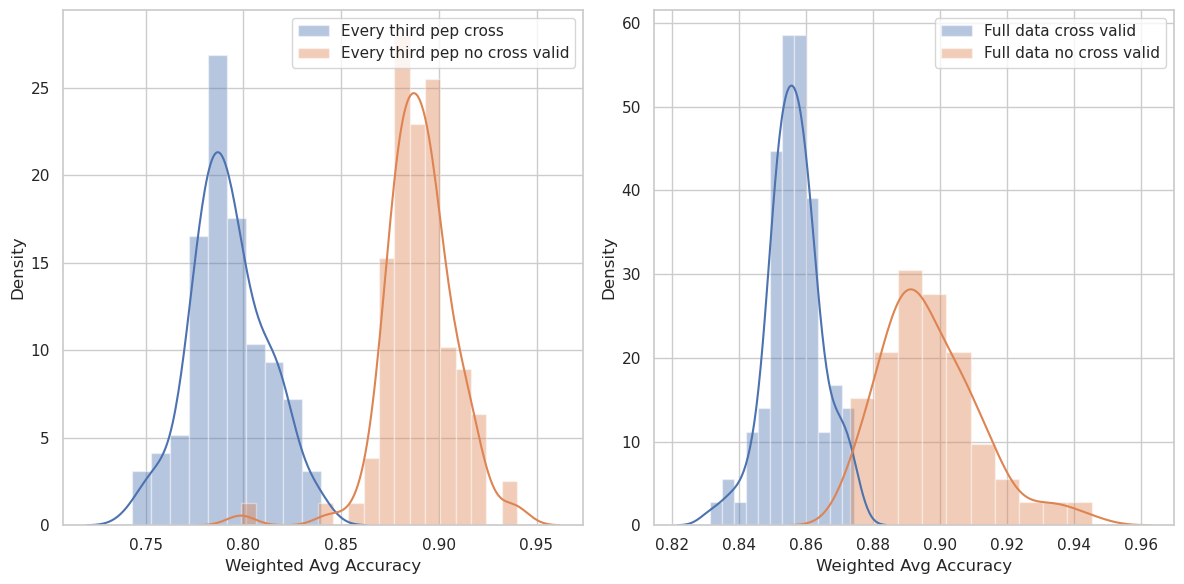

In [19]:
label = 'Weighted_Avg_Accuracy'
vis_metric(result,result_not,result_e,result_e_not,label)